In [1]:
import keras
import json
import numpy as np
import pandas as pd
# import nibabel as nib
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K 

# import util
# from public_tests import *
# from test_utils import *
import nibabel as nib
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import src.utils.xraypp as xraypp
import src.utils.plotter as pltter
import src.utils.batchgenerator as dg
import src.utils.models as dl_models

## 0.1. Initialize the xray preprocessor object

In [2]:
HOME_DIR_2D = "./data/nih/images-small/"
DATA_DIR_2D = HOME_DIR_2D
train_df = pd.read_csv("./data/nih/train-small.csv")
valid_df = pd.read_csv("./data/nih/valid-small.csv")
test_df = pd.read_csv("./data/nih/test.csv")
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']
xray_pp_obj = xraypp.XrayPP(
                 train_df=train_df,
                 valid_df=valid_df,
                 test_df=test_df,
                 img_dir=DATA_DIR_2D,
                 target_w=320,
                 target_h=320,
                 labels=labels,
                 )

06/04//2024 01:21:1712389902 PM - INFO - XrayPP: Initializing the Medical Image Preprocessor Class
06/04//2024 01:21:1712389902 PM - INFO - ComputeStats: Initializing the Compute Stats Class
06/04//2024 01:21:1712389902 PM - INFO - XrayPP: Initializing the X-ray image preprocessing class
06/04//2024 01:21:1712389902 PM - INFO - XrayPP: Initializing the X-ray image preprocessing class
06/04//2024 01:21:1712389902 PM - INFO - XrayPP: Image Directory: data/nih/images-small
06/04//2024 01:21:1712389902 PM - INFO - XrayPP: Image Directory: data/nih/images-small


In [3]:
dg_xray = xray_pp_obj.get_generator(batch_size=32, num_channels=2)

06/04//2024 01:21:1712389903 PM - INFO - XrayPP: Initializing the Data Generator For Training, Testing and Validation generators
06/04//2024 01:21:1712389903 PM - INFO - XrayPP: Initializing the Data Generator For Training, Testing and Validation generators
Found 1000 validated image filenames.
Found 1000 validated image filenames.
Found 200 validated image filenames.
Found 420 validated image filenames.


In [4]:
xray_pp_obj.update_kwargs()

06/04//2024 01:21:1712389904 PM - INFO - XrayPP: Updating the kwargs for 2D model
06/04//2024 01:21:1712389904 PM - INFO - XrayPP: Updating the kwargs for 2D model


{'data_frames': {'train_df':                 Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
  0    00008270_015.png            0             0              0      0   
  1    00029855_001.png            1             0              0      0   
  2    00001297_000.png            0             0              0      0   
  3    00012359_002.png            0             0              0      0   
  4    00017951_001.png            0             0              0      0   
  ..                ...          ...           ...            ...    ...   
  995  00015869_010.png            0             0              0      0   
  996  00020113_005.png            0             0              0      0   
  997  00019939_000.png            0             0              0      0   
  998  00030496_000.png            0             0              0      0   
  999  00012363_002.png            0             0              0      0   
  
       Effusion  Emphysema  Fibrosis  Hernia  Infiltration

In [5]:
xray_pp_obj.kwargs

{'data_frames': {'train_df':                 Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
  0    00008270_015.png            0             0              0      0   
  1    00029855_001.png            1             0              0      0   
  2    00001297_000.png            0             0              0      0   
  3    00012359_002.png            0             0              0      0   
  4    00017951_001.png            0             0              0      0   
  ..                ...          ...           ...            ...    ...   
  995  00015869_010.png            0             0              0      0   
  996  00020113_005.png            0             0              0      0   
  997  00019939_000.png            0             0              0      0   
  998  00030496_000.png            0             0              0      0   
  999  00012363_002.png            0             0              0      0   
  
       Effusion  Emphysema  Fibrosis  Hernia  Infiltration

In [6]:
train_generator = dg_xray.get_train_generator()
valid_generator, test_generator = dg_xray.get_test_and_valid_generator()

Found 1000 validated image filenames.
Found 1000 validated image filenames.
Found 200 validated image filenames.
Found 420 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


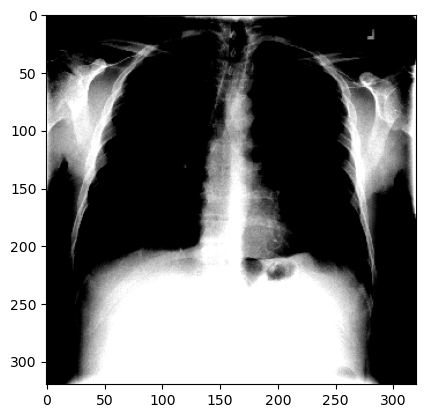

In [7]:
x, y = train_generator.__getitem__(0)
plt.imshow(x[0]);

## 1.0. Applying DenseNet Model using models and compute stats modules to imbalanced Chest X-Ray Datasets

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

# import util
# from public_tests import *
# from test_utils import *

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## 1.1. Get contributions and frequencies of positive, negative classes using training data

In [9]:

model_obj = dl_models.DLModels(model_2d_dir='./models/nih/densenet.hdf5', model_3d_dir='./models/pretrained_model.h5', pre_trained_wts='./models/nih/pretrained_model.h5')
labels = xray_pp_obj.labels
freq_pos, freq_neg = model_obj.cs.compute_class_freqs(train_generator.labels)
pos_neg_dict = model_obj.cs.calc_pos_neg_weights(freq_pos=freq_pos, freq_neg=freq_neg)


06/04//2024 01:21:1712389910 PM - INFO - DLModels: Initializing the Deep Learning Model Class
06/04//2024 01:21:1712389910 PM - INFO - ComputeStats: Initializing the Compute Stats Class
06/04//2024 01:21:1712389910 PM - INFO - ComputeStats: Initializing the Compute Stats Class


Text(0.5, 1.0, 'Class distribution Before Balancing')

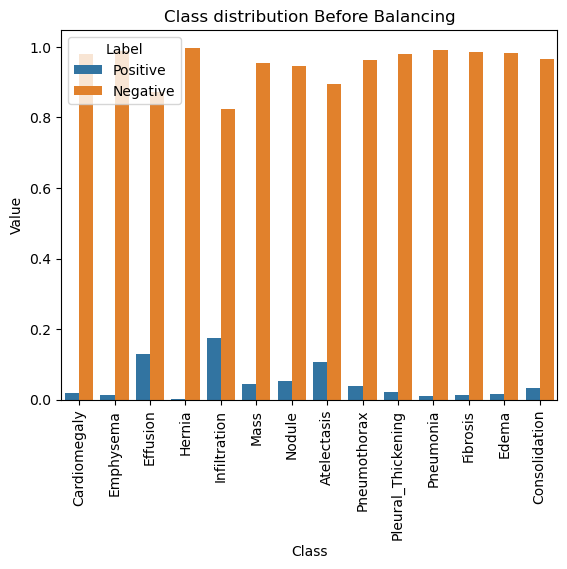

In [10]:
# Create DataFrame for positive values
pos_data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": freq_pos})

# Create DataFrame for negative values
neg_data = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l, v in enumerate(freq_neg)])

# Concatenate positive and negative data
data = pd.concat([pos_data, neg_data], ignore_index=True)

# Plot data
plt.xticks(rotation=90)
f = sns.barplot(x="Class", y="Value", hue="Label", data=data)
f.set_title('Class distribution Before Balancing')

Text(0.5, 1.0, 'Class distribution After Balancing')

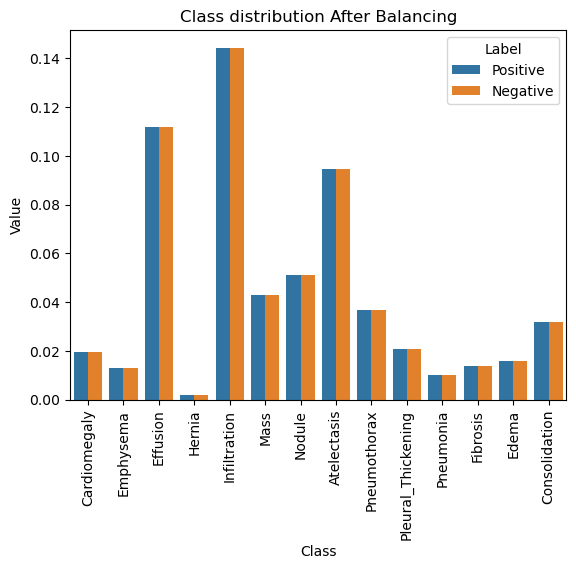

In [11]:
# Create DataFrame for positive contributions
pos_data = pd.DataFrame({"Class": labels, "Label": "Positive", "Value": pos_neg_dict['pos_contribution'] })

# Create DataFrame for negative contributions
neg_data = pd.DataFrame([{"Class": labels[l], "Label": "Negative", "Value": v} for l, v in enumerate(pos_neg_dict['neg_contribution'])])

# Concatenate positive and negative contributions
data = pd.concat([pos_data, neg_data], ignore_index=True)

# Plot data
plt.xticks(rotation=90)
g = sns.barplot(x="Class", y="Value", hue="Label" ,data=data);
g.set_title('Class distribution After Balancing')

## 1.2. Get DenseNet Model Summary

In [12]:
kwargs = {
        'test_generator': test_generator,
        'labels': labels,
        'pos_weights': pos_neg_dict['pos_weights'],
        'neg_weights': pos_neg_dict['neg_weights'],
}

model_2d = model_obj.weighted_dense_net_model_2d(**kwargs)
model_2d.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, None, None,   0          ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1/conv (Conv2D)            (None, None, None,   9408        ['zero_padding2d[0][0]']         
                                64)                                                           

## 1.3. Predict vals using DenseNet Model

In [13]:
model_obj.model_2d_dir

'./models/nih/densenet.hdf5'

In [14]:
predicted_vals = model_obj.predict_2d(**kwargs)

Received kwargs: {'test_generator': <keras.preprocessing.image.DataFrameIterator object at 0x15ee0a390>, 'labels': ['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax', 'Pleural_Thickening', 'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation'], 'pos_weights': array([0.98 , 0.987, 0.872, 0.998, 0.825, 0.955, 0.946, 0.894, 0.962,
       0.979, 0.99 , 0.986, 0.984, 0.967]), 'neg_weights': array([0.02 , 0.013, 0.128, 0.002, 0.175, 0.045, 0.054, 0.106, 0.038,
       0.021, 0.01 , 0.014, 0.016, 0.033])}


/Users/abhilashdhal/AIMedicine/src/utils/models.py:233: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicted_vals = model.predict_generator(test_generator, steps=len(test_generator))
2024-04-06 13:21:59.504202: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2024-04-06 13:21:59.533483: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


## 2. Evaluation and Interpretation

## 2.1. Model Prediction Performance

In [15]:
import random
random.seed(a=None, version=2)

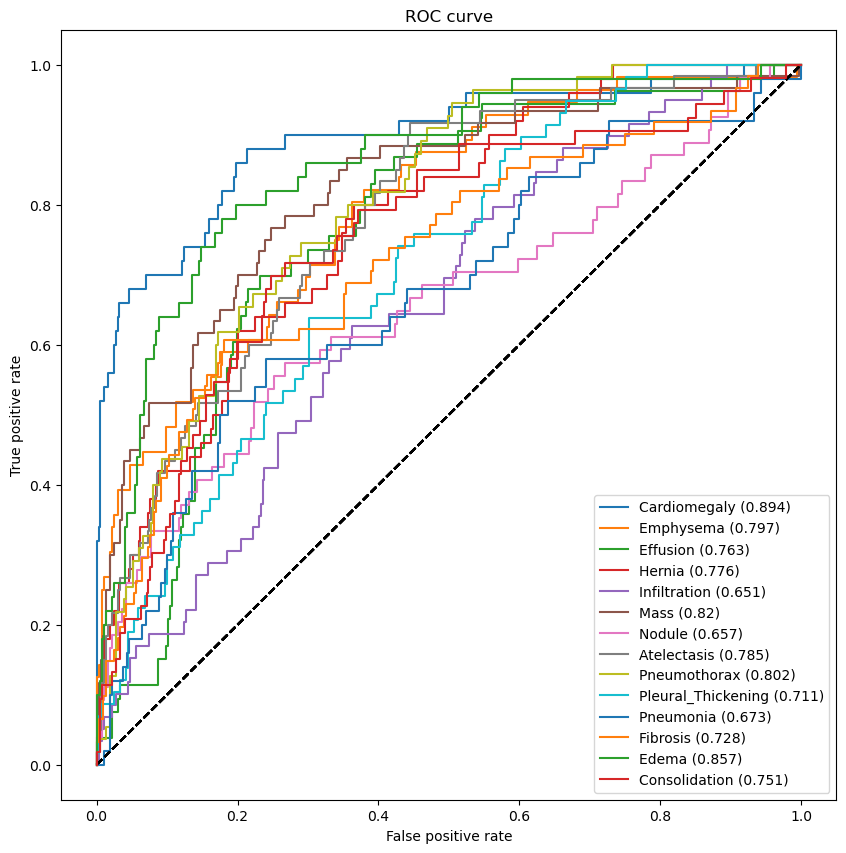

In [16]:
auc_rocs = model_obj.cs.get_roc_curve(labels, predicted_vals, test_generator)

## 2.2. Model Interpretation

One of the challenges of using deep learning in medicine is that the complex architecture used for neural networks makes them much harder to interpret compared to traditional machine learning models (e.g. linear models).
One of the most common approaches aimed at increasing the interpretability of models for computer vision tasks is to use Class Activation Maps (CAM).

- Class activation maps are useful for understanding where the model is "looking" when classifying an image.

- In this section we will use a GradCAM's technique to produce a heatmap highlighting the important regions in the image for predicting the pathological condition. This is done by extracting the gradients of each predicted class, flowing into our model's final convolutional layer. 
- Look at the compute_gradcam which has been provided for you in to see how this is done with the Keras framework.
- It is worth mentioning that GradCAM does not provide a full explanation of the reasoning for each classification probability.
- However, it is still a useful tool for "debugging" our model and augmenting our prediction so that an expert could validate that a prediction is indeed due to the model focusing on the right regions of the image.

1/1 [==============================] - 1s 766ms/step
Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Mass
Generating gradcam for class Pneumothorax
Generating gradcam for class Edema


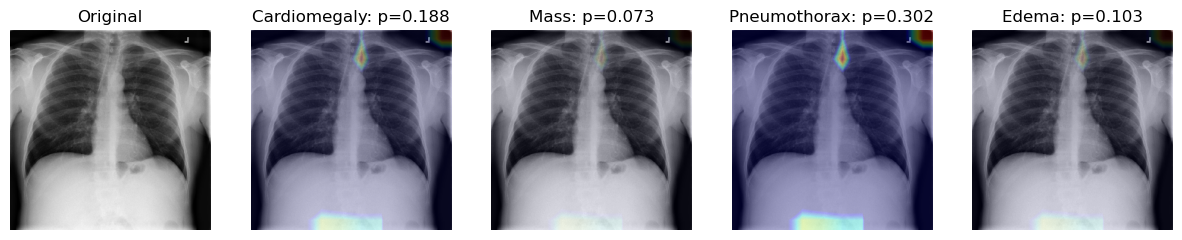

In [17]:
# only show the labels with top 4 AUC
labels_to_show = np.take(labels, np.argsort(auc_rocs)[::-1])[:4]
model_obj.cs.compute_gradcam(model_2d, img='00008270_015.png', image_dir=DATA_DIR_2D, df=train_df, labels=labels, selected_labels=labels_to_show, W = 320, H=320)

1/1 [==============================] - 0s 102ms/step
Loading original image
Generating gradcam for class Cardiomegaly
Generating gradcam for class Mass
Generating gradcam for class Pneumothorax
Generating gradcam for class Edema


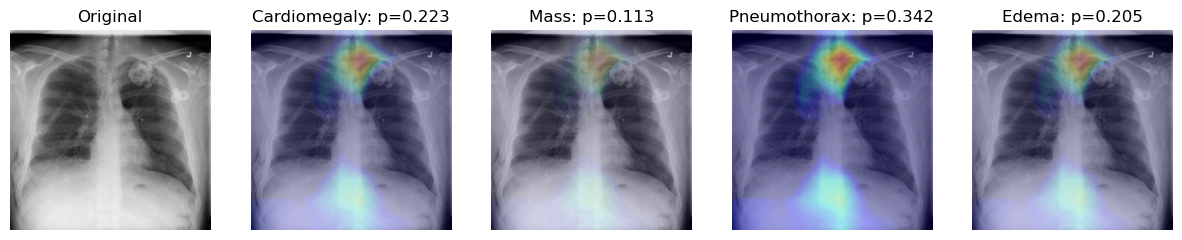

In [18]:
img_ex = '00011355_002.png'
model_obj.cs.compute_gradcam(model_2d, img=img_ex, image_dir=DATA_DIR_2D, df=train_df, labels=labels, selected_labels=labels_to_show, W = 320, H=320)